# 2.3 지도 학습 알고리즘

In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

<br>

각각의 머신러닝 알고리즘의 아래와 같은 특징 확인

- 데이터로부터 어떻게 **학습**하고 **예측**하는가?
- 모델의 **복잡도**가 어떤 역할을 하는가?
- 각 알고리즘이 **모델을 어떻게 만드는가**?
- 모델들의 **장단점**은?
- 각 모델에는 **어떤 데이터**가 잘 들어맞을 지?
- **매개변수**와 **옵션**의 의미는 무엇인지?

- 모델을 이해하면 여러 머신러닝 알고리즘의 작동 방식을 더 잘 알수 있음
- 이 장은 특정 알고리즘의 작동 방식이 굼금할 때 확인하는 참고 자료로 사용

<br>

## 2.3.1 예제에 사용할 데이터셋

<br>

- 여러 알고리즘을 설명하기 위해 여러 개의 데이터셋 사용

<br>

### 1) forge 데이터셋

- 두 개의 특성을 가진 인위적으로 만든 **이진 분류 데이터셋**
- 이 데이터셋의 모든 데이터 포인트를 산점도로 그린 그림이 **[그림 2-2]** 이다.
  - x축 : 첫 번째 특성
  - y축 : 두 번째 특성
  - 점 하나 : 각 데이터 포인트
  - 점의 색과 모양 : 데이터 포인트가 속한 그룹

X.shape: (26, 2)


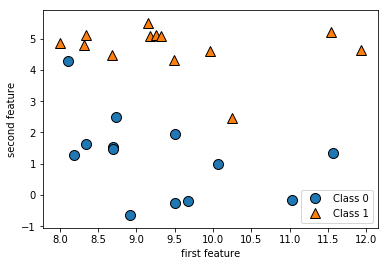

In [24]:
# 데이터셋 만듬
X, y = mglearn.datasets.make_forge()

# 산점도를 그림
mglearn.discrete_scatter(X[:,0], X[:,1], y)
#plt.legend(["클래스 0", "클래스 1"], loc=4) # 범례
plt.legend(["Class 0", "Class 1"], loc=4) # 범례
#plt.xlabel("첫 번째 특성")
plt.xlabel("first feature")
#plt.ylabel("두 번째 특성")
plt.ylabel("second feature")

print("X.shape: {}".format(X.shape))

<div style="text-align:left">
    <b>[그림 2-2]</b> forge 데이터셋의 산점도
</div>

- `X.shape` 값 : 데이터 포인트 26개, 특성 2개

<br>

### 2) wave 데이터셋

- **회귀** 알고리즘 설명에 사용할 데이터셋
- 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가짐
- **[그림 2-3]** : 특성을 x축에 놓고 회귀의 타깃(출력)을 y축에 놓음

Text(0,0.5,'target')

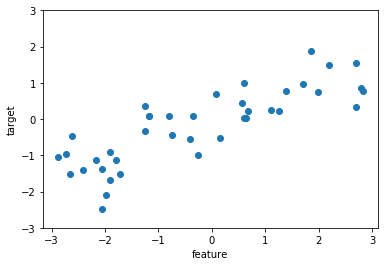

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
#plt.xlabel("특성")
plt.xlabel("feature")
#plt.ylabel("타깃")
plt.ylabel("target")

<div style="text-align:left">
    <b>[그림 2-3]</b> x 축을 특성, y 축을 타깃으로 한 wave 데이터셋의 그래프
</div>

<br>

- 2차원에선 두개 이상의 특성을 표현하기 어려움
- 손쉽게 시각화하기 위해서 간단한 저차원 데이터셋을 사용
- **저차원 데이터셋**(특성이 적은 데이터셋)에서 얻은 직관이 **고차원 데이터셋**(특성이 많은 데이터셋)에서 그대로 유지되지 않을 수 있다.

<br>

### 3) 위스콘신 유방암(Wisconsin Breast Cancer) 데이터셋

- **이진분류** 데이터셋
- scikit-learn에 들어 있는 실제 데이터셋
- 유방암 종양의 임상 데이터를 기록한 데이터셋
- 줄여서 **cancer** 라고 표현  
  
  
  
- 데이터셋의 레이블
  - 양성(benign) : 해롭지 않은 종양
  - 악성(malignant) : 암 종양  
  
  
- 조직 데이터를 기반으로 종양이 악성인지를 예측  
  
  
- scikit-learn에 있는 `load_breast_cancer` 함수를 사용해 해당 데이터셋을 불러올 수 있음

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


<br>

**NOTE**
- scikit-learn에 포함된 데이터셋은 실제 데이터와 데이터셋 관련 정보를 담고 있는 `Bunch` 객체에 저장되어 있음
- `Bunch` 객체는 파이썬 딕셔너리(dictionary)와 유사하지만 **점 표기법**을 사용할 수 있음 (`bunch['key']` $\rightarrow$ `bunch.key`)

<br>

- cancer 데이터셋은 569개의 데이터 포인트와 특성 30개를 가지고 있음

In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


- 569개의 데이터 포인트 중 
  - 악성 = 212개
  - 양성 = 357개

In [6]:
print("클래스별 샘플 개수: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수: 
{'malignant': 212, 'benign': 357}


<br>

- **`cancer.feature_names`** : 각 특성의 의미를 확인할 수 있음

In [21]:
print("특성 이름: \n{}".format(cancer.feature_names))

특성 이름: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<br>

- **`cancer.DESCR`** : 데이터에 관한 자세한 정보 확인

In [23]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

<br>

### 4) 보스턴 주택가격(Boston Housing) 데이터셋

- scikit-learn에 들어 있는 실제 데이터셋
- **회귀** 분석용 실제 데이터셋
- 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측  
  
  
- 데이터 포인트 = 506개
- 특성 = 13개

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


<br>

- **`boston.DESCR`** : 데이터셋의 자세한 정보 확인 가능

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<br>

- 13개의 입력 특성뿐 아니라 **특성끼리 곱**하여(또는 **상호작용**) 의도적으로 확장
- 범죄율과 고속도로 접근성의 개별 특성들과 **범죄율과 고속도로 접근성의 곱**도 특성으로 생각한다.

**특성 공학 (feature engineering)**

- 위와 같이 특성을 유도해내는 것
- 4장에서 자세히 다룸

<br>

- 유도된 데이터셋은 `load_extended_boston` 함수를 사용해 불러들일 수 있음

In [28]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


- 13개의 원래 특성에 13개에서 2개씩 (중복 포함) 짝지은 91개의 특성을 더해 총 104개가 됨

- 첫 번째 특성으로 13개의 교차항 만들어짐
- 두 번째 특성에서 첫 번째 특성을 제외한 12개의 교차항이 만들어 짐
- 세 번째 특성에서 11개
- 13 + 12 + 11 + $\cdots$ + 1 = 91

- 중복을 고려하지 않은 이항 계수 공식 :  
  
  
$
\qquad
\binom{n}{k} = {n! \over k! (n-k)!} \Rightarrow \binom{13}{2} = {13! \over 2! (13-2)!} = 78
$


<br>

- `load_extended_boston()` 함수는 scikit-learn의 `PolynomialFeatures` 함수를 사용해 중복을 포함한 조합을 만듬
- 중목을 포함한 조합의 수를 구하는 공식 :  
  
  
$
\qquad
\left(\binom{n}{k}\right) = \binom{n + k - 1}{k} \Rightarrow \left(\binom{13}{2}\right) = \binom{13 + 2 - 1}{2} = {14! \over 2!(14-2)!} = 91
$